# M200b mass function on our clustered data 

each of the particle has a constant mass of 2.75491975e+43 g 

In [1]:
%pylab inline
import yt

Populating the interactive namespace from numpy and matplotlib


In [2]:
centers  = np.loadtxt("../scivis2MMBK/centers40000.txt")
labels  = np.loadtxt("../scivis2MMBK/labels40000.txt")
density  = np.loadtxt("../scivis2MMBK/density40000.txt")

In [3]:
# print shape(centers)
# print shape(labels)
# print shape(density)

In [4]:
yt.funcs.mylog.setLevel(50)

In [5]:
ds = yt.load("../../ds14_scivis_0128_e4_dt04_1.0000")
ad = ds.all_data()
grid= ds.covering_grid(1,[0,0.0,0.0],dims=[32,32,32])
pcl_dens =  grid[('deposit','all_cic')]

In [6]:
mass = ad[('all', 'mass')]
particle_mass = ad[('all', 'particle_mass')]

In [7]:
print mass == particle_mass
print particle_mass

[ True  True  True ...,  True  True  True]
[  2.75491975e+43   2.75491975e+43   2.75491975e+43 ...,   2.75491975e+43
   2.75491975e+43   2.75491975e+43] g


In [8]:
np.unique(particle_mass)

YTArray([  2.75491975e+43]) g

In [9]:
# ds.field_info

In [24]:
halo_catalog = np.loadtxt("../../darksky_catalog/ds14_a_halos_1.0000_filter_1e15.txt",skiprows=3)

In [32]:
import thingking
import matplotlib.colors as col
import matplotlib.cm as cm
import sys, string, math

def discrete_cmap(N=8):
    """create a colormap with N (N<15) discrete colors and register it"""
    # define individual colors as hex values
    cpool = [ '#000000', '#ff0000', '#00e000', '#0000ff', '#00e0e0',
              '#ff00ff', '#e0e000', '#ffa500', '#ee82ee', '#808080',
              '#800000', '#008000', '#000080', '#808000', '#800080' ]
    cmap3 = col.ListedColormap(cpool[0:N], 'indexed')
    cm.register_cmap(cmap=cmap3)

discrete_cmap(5)
color=cm.get_cmap('indexed')

mf_prefix = "http://darksky.slac.stanford.edu/data_release/mass_function/"
mfs = [
    #"ds14_a_halos_1.0000.hist50_m200b.sdf",
    "ds14_a_halos_1.0000.hist8_m200b",
    "ds14_g_1600_4096_m200b_1.0000.hist8_m200b",
    "ds14_g_800_4096_m200b_1.0000.hist8_m200b",
    "ds14_g_200_2048_m200b_1.0000.hist8_m200b",
    "ds14_g_100_2048_m200b_1.0000.hist8_m200b",
]
mfs = [mf_prefix + mf for mf in mfs]

In [54]:
M_sol = 1.9891e33 #grams
h = 0.6881 #reduced hubble constant
# m = 2.75491975e+43 /M_sol*h 
# print "mass per particle : ", m,"Msun/h"
m=3.9e10
N= halo_catalog[:,4]/m #number of particle per halo = m200b/mass per particle

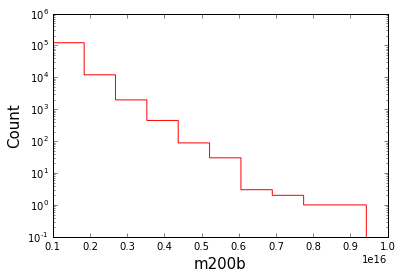

In [51]:
m200b= halo_catalog[:,4]
n_1, bins, patches  = plt.hist(m200b,log=True,histtype='step',color="red");
plt.xlabel("m200b",fontsize = 15)
plt.ylabel("Count",fontsize = 15)

In [52]:
# plt.xlabel("log10(m200b)",fontsize = 15)
# plt.ylabel("dN/dlnM ",fontsize = 15)
# n_2, bins_2, patches  = plt.hist(m200_b,log=True,histtype='step')#, normed=True)
# ngtm_2 = np.cumsum(n_2[::-1])[::-1]
# plt.semilogy(bins_2[:-1], ngtm_2/V,label="Halo_catalog",ms=4, mec='None',color="blue")

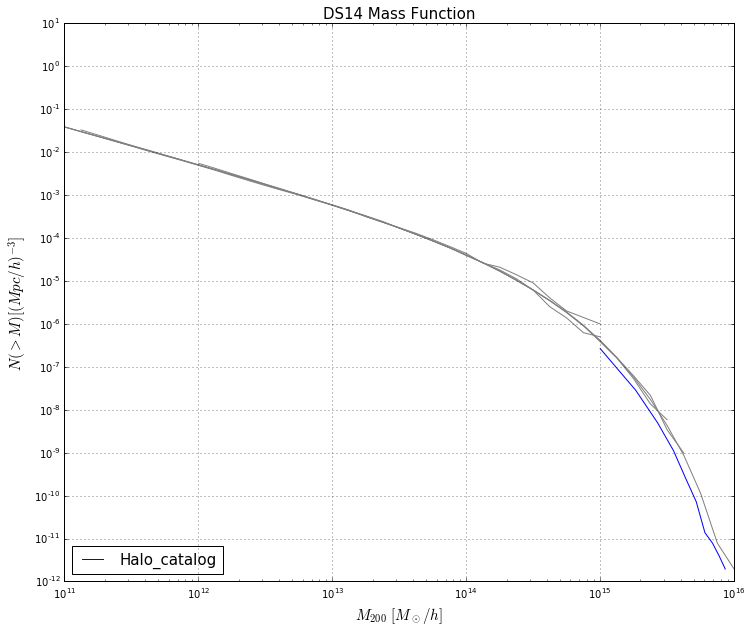

In [53]:
V = 8000**3
i=0
fig = plt.figure(figsize=(12,10))
xx = fig.add_subplot(111)
vols = np.array([8000.0, 1600, 800, 200, 100])
for aname, vol in zip(mfs, vols):
    bin_center_mass, dn_dlnM, sigma, dlogsdlogm, lower_pmass, n, expected, dm, ds, dlnm, dlns = thingking.loadtxt(aname, unpack=True)
    tag = aname.split("/")[-1]
    mask = (lower_pmass[:] >= 0) * (n[:] >= 0)
    if n.sum() > 0:
        ngtm = np.cumsum(n[mask][::-1])[::-1]
        xx.loglog(bin_center_mass[mask], ngtm/vol**3,ms=4, mec='None', color="gray")#,label="ds14_histo8* data")#, label=tag)
    i += 1

ngtm = np.cumsum(n_1[::-1])[::-1]
xx.loglog(bins[:-1], ngtm/V,label="Halo_catalog",ms=4, mec='None',color="blue")
# ngtm2 = np.cumsum(n_2[::-1])[::-1]
# xx.loglog(bins[:-1], ngtm2/V,label="Clustered results",ms=4, mec='None',color="red")

xx.set_title('DS14 Mass Function',fontsize=15)
xx.set_xscale('log')
xx.set_yscale('log')
xx.set_xlabel('$M_{200}\  [M_\odot/h]$', fontdict={'fontsize':14},fontsize=15)
xx.set_ylabel('$N(>M) [(Mpc/h)^{-3}]$', fontdict={'fontsize':14},fontsize=15)
leg = xx.legend(loc="lower left",labelspacing=.5,fontsize=15)
xx.xaxis.grid(True, which='major')
xx.yaxis.grid(True, which='major')
plt.xlim(1e11,1e16)
plt.show()